<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/pykalman_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykalman

In [ ]:
!pip install microprediction

# Hello world example
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [8]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='yarx_vlty_1_qcom.json')[:500][::-1]
YS[:3]

[-6.374964226610424, -2.4680065797791064, -2.4675645627653116]

In [11]:
from pykalman import KalmanFilter

def run(ys):
  burnin = 100
  kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
  ys_train = [ [y] for y in ys[:burnin] ]
  kf = kf.em(ys_train)
  ys_test = [ [y] for y in ys[burnin:]]
  x_rest = kf.filter(ys_test)
  x_rest_flat = [x[0] for x in x_rest[0]]
  return [0] + ys[:burnin] + x_rest_flat
XS = run(YS)
len(XS)


400

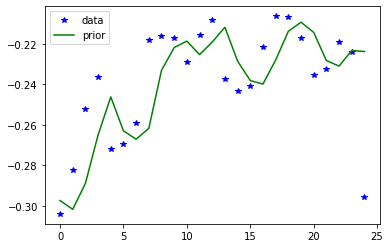

In [12]:
import matplotlib.pyplot as plt
plt.plot(YS[225:250],'*b')
plt.plot(XS[225:250],'g')
plt.legend(['data','prior'])